## Problem 1
(1) The Turing test, developed by Alan Turing in 1950, is a test of a machine's ability to exhibit intelligent behaviour equivalent to, or indistinguishable from, that of a human. Turing proposed that a human evaluator would judge natural language conversations between a human and a machine designed to generate human-like responses. The evaluator would be aware that one of the two partners in conversation is a machine, and all participants would be separated from one another. The conversation would be limited to a text-only channel such as a computer keyboard and screen so the result would not depend on the machine's ability to render words as speech. If the evaluator cannot reliably tell the machine from the human, the machine is said to have passed the test. The test results do not depend on the machine's ability to give correct answers to questions, only how closely its answers resemble those a human would give.

(1-1) Describe GAN algorighm with the figure shown below.

<img src='./fig_1.png' width="600" height="300">

Generative adversarial networks are deep learning systems that can learn to mimic a given distribution of data and generate material, such as images, music, speech, or text, that is similar to what humans produce. GANs consist of two neural networks, one (Generator, *G*) trained to generate data and the other (Discriminator, *D*) trained to distinguish fake data from real data. 

The role of *D* is to estimate the probability that a given sample came from the real data rather than being provided by *G*. Hence, the probability from the real data should be high (1), and the fake's should be low (0). The *G*, in turn, is trained to estimate the probability "distribution" of the real samples in order to provide generated samples resembling real data. At first, *G* is fed with random data from a latent space. The random data is required to transform them so that they resemble the real samples. For each batch of training data containing labeled real and generated samples, you update the parameters of *D* to minimize a loss function. After the parameters of *D* are updated, you train *G* to produce better generated samples. The output of *G* is connected to *D*, whose parameters are kept frozen. During training, as the parameters of *D* and *G* are updated, it’s expected that the generated samples given by *G* will more closely resemble the real data, and *D* will have more trouble distinguishing between real and generated data.

In this figure, the generator tries to produce the realistic-looking man images which are indistinguishable from the real images, as judged by the discriminator whose job is to tell real man from fake man. This is why these structures are called generative adversarial networks. Because *G* and *D* are trained to compete with each other: *G* tries to get better at fooling *D*, while *D* tries to get better at identifying generated samples.

(1-2) You are also asked to write loss functions and optimizaton procedure as well.

GANs try to replicate a probability distribution. They should therefore use loss functions that reflect the distance between the distribution of the data generated by the GAN and the distribution of the real data.

There're two loss functions: one for the discriminator training and one for the generator training.

Both the generator and discriminator losses derive from a single measure of distance (using cross-entropy) between probability distributions.
The generator, however, can only affect one term in the distance measure: the term that reflects the distribution of the fake data.
So, during generator training, we drop the other term, which reflects the distribution of the real data.

Therefore, the generator and discriminator losses look different in the end, even though they derive from a single formula.

* E<sub>*x* ~ *P*<sub>data</sub>(*x*)</sub>: the expected value over all real data instances
* D(*x*): the discriminator's estimate of the probability that real data instance *x* is real

* E<sub>*x* ~ *P*<sub>*z*</sub>(*z*)</sub>: the expected value over all random inputs to the generator (in effect, over all generated fake instances G(*z*))
* G(*z*): the generator's output when given noise *z*
* D(G(*z*)): the discriminator's estimate of the probability that a fake instance is real

As loss function of discriminator, maximize E<sub>*x* ~ *P*<sub>data</sub>(*x*)</sub>[log D(x)] + E<sub>*x* ~ *P*<sub>*z*</sub>(*z*)</sub>[log(1 – D(G(z)))] = 
minimize E<sub>*x* ~ *P*<sub>data</sub>(*x*)</sub>[-log D(x)] + E<sub>*x* ~ *P*<sub>*z*</sub>(*z*)</sub>[-log(1 – D(G(z)))]

Described mathematically, the discriminator seeks to maximize the average of the log probability for real images and the log of the inverted probabilities of fake images.

As loss function of generator, minimize E<sub>*x* ~ *P*<sub>*z*</sub>(*z*)</sub>[log(1 – D(G(z)))] (will-be-modified)

The generator seeks to minimize the log of the inverse probability predicted by the discriminator for fake images.

However, this has the effect of encouraging the generator to generate samples that have a low probability of being fake.
In other words, at the beginning of training, the discriminator can clearly classify the generated image as fake because the quality of the image is very low.
This means that D(G(*z*)) is almost zero at early stages of training. So, if it cannot learn as quickly as the discriminator, the discriminator wins, the game ends, and the model cannot be trained effectively. In practice, this loss function for the generator saturates.

The Non-Saturating GAN Loss is a modification to the generator loss to overcome the saturation problem.

As loss function of generator, maximize E<sub>*x* ~ *P*<sub>*z*</sub>(*z*)</sub>[log(D(G(z)))] = minimize E<sub>*x* ~ *P*<sub>*z*</sub>(*z*)</sub>[-log(D(G(z)))]

It is a subtle change that involves the generator maximizing the log of the discriminator probabilities for generated images instead of minimizing the log of the inverted discriminator probabilities for generated images. In the previous case, the generator sought to minimize the probability of images being predicted as fake. Here, the generator seeks to maximize the probability of images being predicted as real.

At last, to solve and optimize a MinMax problem of two loss function,

* For the Discriminator,
<img src='./fig_4.png' width="600" height="300">

* For the Generator,
<img src='./fig_5.png' width="600" height="300">

(2) You are training a GAN to generate nice human face images. The generator cost  J(G)  is extremly low, but the generator is not generating meaningful output images. What could be the reason? Describe it in relation to the loss function of the GAN.

The reason GAN model is difficult to train is that both the generator model and the discriminator model are trained simultaneously in a zero sum game. This means that improvements to one model come at the expense of the other model.

An example of one of what's happening above the circumstance is when the discriminotor is trained in a completely wrong direction. When the discriminator learns in the direction of calculating the generated image as a real image (completely failed learning), the weight of the initial generator may not be values that generate the realistic image, but D(G(*z*)) may continue to close to 1 and the loss of the generator may, accordingly, continue to be lowered.

## Probelm 2
By the GAN algorithm, we can even change the style of images. In this problem, we will change the white-colored digit in a black background image to the black-colored digit in a white background image.

We will use the following GAN structure.

<img src='./fig_2.png' width="600" height="300">

Description

* Domain A: white-colored number in a black background
* Domain B: black-colored number in a white background


* Generate Xab image by generator Gab
  * the structure of Gab is like an autoencoder
* Generate Xaba image by generator Gba
  * the structure of Gba is like an autoencoder


* Train the style to Gab generate styled image Xab
  * give reconstructed Xab image as a fake image and style image as a real image to the discriminator.

Note: I strongly recommend you to use either GPU or Colab. Don't use CPU to train your model! It will take a long time to complete training.

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from six.moves import cPickle

import tensorflow as tf

2021-12-02 00:50:00.017666: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


(1) Load data. Then make color images inveted and plot one of them.

* one.pkl
  * white-colored number in a black background image

In [2]:
with open('./one.pkl', 'rb') as f:
    digits = pickle.load(f)

orig_img = digits[0].reshape(-1, 28)
invt_img = np.abs(digits[0] - 1).reshape(-1, 28)

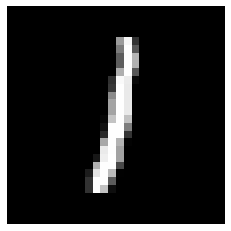

In [3]:
plt.imshow(orig_img, cmap='gray')
plt.axis('off')
plt.show()

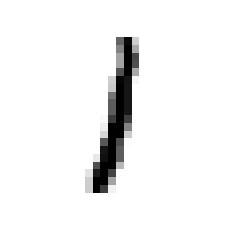

In [4]:
plt.imshow(invt_img, cmap='gray')
plt.axis('off')
plt.show()

(2) Define your model.

* Generator AB
  * n_G_input: 28 × 28
  * n_G_encoder1: 256
  * n_G_latent1: 50
  * n_G_decoder1: 256


* Generator BA
  * n_G_encoder2: 256
  * n_G_latent2: 50
  * n_G_decoder2: 256


* Discriminator
  * n_D_input: 28 × 28
  * n_D_hidden: 256
  * n_D_output: 2

In [5]:
n_G_input = 784
n_G_encoder = 256
n_G_latent = 50
n_G_decoder = 256
n_G_output = 784

n_D_input = 784
n_D_hidden = 256
n_D_output = 2

In [6]:
generator_AB = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=n_G_encoder, input_dim=n_G_input, activation='relu'),
    tf.keras.layers.Dense(units=n_G_latent, activation='relu'),
    tf.keras.layers.Dense(units=n_G_decoder, activation='relu'),
    tf.keras.layers.Dense(units=n_G_output, activation='sigmoid')
])

generator_BA = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=n_G_encoder, input_dim=n_G_input, activation='relu'),
    tf.keras.layers.Dense(units=n_G_latent, activation='relu'),
    tf.keras.layers.Dense(units=n_G_decoder, activation='relu'),
    tf.keras.layers.Dense(units=n_G_output, activation='sigmoid')
])

2021-12-02 00:50:16.702814: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-02 00:50:16.704709: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-12-02 00:50:22.117915: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:18:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2021-12-02 00:50:22.118834: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:3b:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2021-12-02 00:50:22.119643: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 2 with properties: 
pciBusID: 0000:86:00.0 name: GeFo

In [7]:
discriminator = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=n_D_hidden, input_dim=n_D_input, activation='relu'),
    tf.keras.layers.Dense(units=n_D_output, activation='sigmoid')
])

discriminator.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
                      loss='binary_crossentropy')

In [8]:
Xab_input = tf.keras.layers.Input(shape=(n_G_input, ))
Xab = generator_AB(Xab_input)
discriminator.trainable = False
Xab_output = discriminator(Xab)

Xab_combined = tf.keras.models.Model(inputs=Xab_input,
                                     outputs=Xab_output)
Xab_combined.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002), 
                     loss='binary_crossentropy')

In [9]:
Xaba = generator_BA(Xab)
reconstruct_error = tf.keras.models.Model(inputs=Xab_input,
                                          outputs=Xaba)
reconstruct_error.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
                          loss='MeanSquaredError')

In [10]:
digits.shape

(6000, 784)

In [11]:
style_x = np.abs(digits - 1)[:3000]
orig_digits = digits[3000:]

In [12]:
def make_batch(data, size=100):
    random_indices = np.random.choice(len(data), size, replace=False)
    random_rows = data[random_indices, :]
    
    return random_rows

In [13]:
def plot_generated_images(generator_1, generator_2, samples=2):
    noise = make_batch(orig_digits, size=1)
    
    generated_images_1 = generator_1.predict(noise)
    generated_images_2 = generator_2.predict(generated_images_1)

    fig, axes = plt.subplots(1, samples, figsize=(12, 8))
    
    axes[0].imshow(generated_images_1.reshape(-1, 28), 'gray', interpolation='nearest')
    axes[0].set_title('Xab domain: black number in white background')
    axes[0].axis('off')
 
    axes[1].imshow(generated_images_2.reshape(-1, 28), 'gray', interpolation='nearest')
    axes[1].set_title('Xba domain: white number in black background')
    axes[1].axis('off')
    
    plt.show()

(3) Refer to the loss function below and train the model. And plot Xab image and Xaba image for each print. Note that we are not asking you to make a perfect inverted image.

<img src='./fig_3.png' width="600" height="300">

Epoch: 0 D_Loss: 1.45484 G_loss: 0.464843


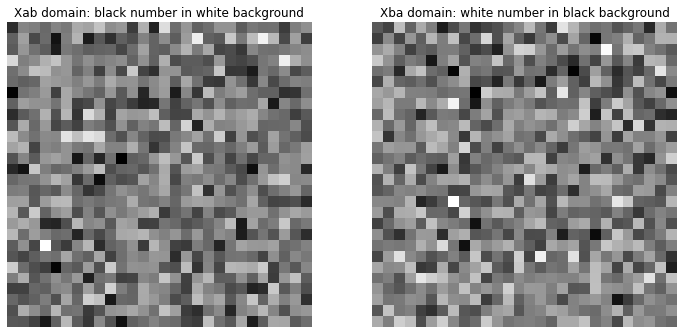

Epoch: 5000 D_Loss: 1.376337 G_loss: 0.704553


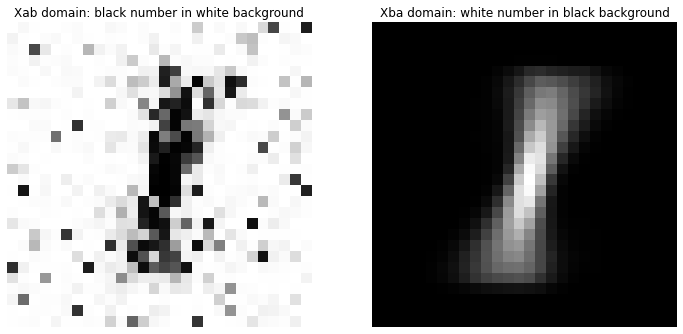

Epoch: 10000 D_Loss: 1.348756 G_loss: 0.68118


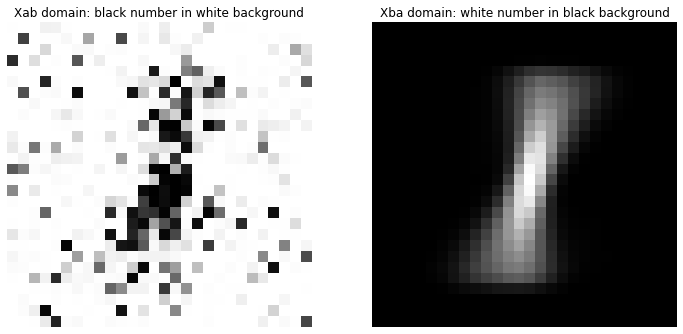

Epoch: 15000 D_Loss: 1.249847 G_loss: 0.763656


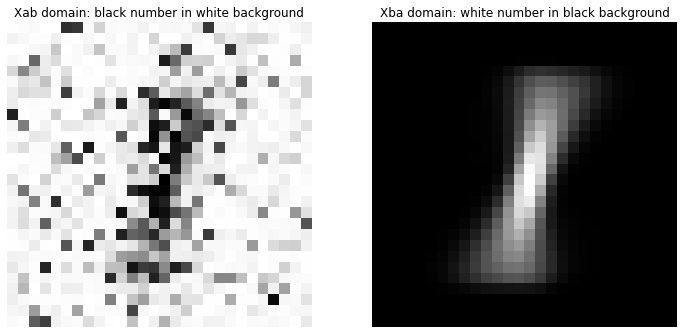

Epoch: 20000 D_Loss: 0.806992 G_loss: 1.180813


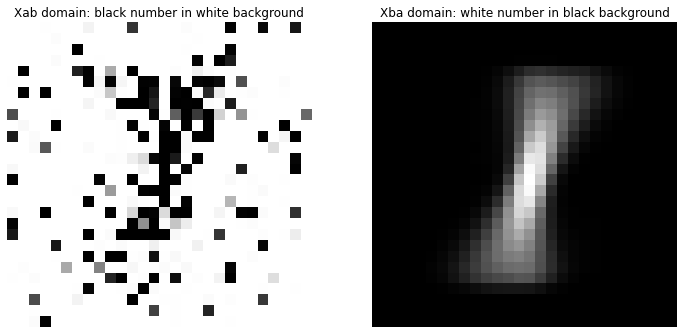

In [15]:
n_iter = 20001
batch_size = 50

fake = tf.one_hot(np.zeros(batch_size), 2)
real = tf.one_hot(np.ones(batch_size), 2)
 
for i in range(n_iter):
    # Train Discriminator
    noise = make_batch(orig_digits, batch_size)
    generated_images = generator_AB.predict(noise)

    idx = np.random.randint(0, style_x.shape[0], batch_size)
    real_images = style_x[idx]

    D_loss_real = discriminator.train_on_batch(real_images, real)
    D_loss_fake = discriminator.train_on_batch(generated_images, fake)
    D_loss = D_loss_real + D_loss_fake

    # Train Generator
    noise = make_batch(orig_digits, batch_size)    
    G_loss = Xab_combined.train_on_batch(noise, real)
    
    # Minimize reconstruct error
    noise = make_batch(orig_digits, batch_size) 
    Xaba_image = generator_BA.predict(generated_images)
    reconst_loss = reconstruct_error.train_on_batch(Xaba_image, noise)
    
    if i % 5000 == 0:
        print('Epoch: {} D_Loss: {} G_loss: {}'.format(
            i, round(D_loss, 6), round(G_loss, 6)))

        plot_generated_images(generator_AB, generator_BA)